100% (263 of 263) |#######################| Elapsed Time: 0:00:14 Time: 0:00:14


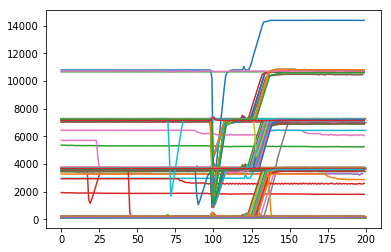

In [20]:
from IMPORT_DATAFRAME_JSON_HDF5 import *
%matplotlib inline
import matplotlib.pyplot as plt

data = import_trasient_from_file("jsons/")
data = map_transients_to_PQ_data(data, "HDF5", 20, ['P'])

for a in range(0, len(data)):
    plt.plot(data.iloc[a]['P'])
    

data['charging_status']=0
data['P_mean']=0
data['P_delta'] = 0
data['P_Plugin']=0
data['P_Unplug'] = 0
for row in range(0, len(data)):
    # Getting the mean power before during and after the timestamp (-T, T)
    # Defining charging_status as 1 for avg(P)>300W else 0 and writing it to a new column
    P_mean = sum(data.iloc[row]['P']) / float(len(data.iloc[row]['P']))
    data.set_value(data.index[row],'P_mean', P_mean)
    if P_mean>300:
        data.set_value(data.index[row],'charging_status',int(1))
    else:
       data.set_value(data.index[row],'charging_status', int(0))
     # Defining if a new car is plugged in during the appearance of the transient
    P_mean_before = sum((data.iloc[row]['P'])[:10]) / float(len((data.iloc[row]['P'])[:10])) 
    P_mean_after = sum((data.iloc[row]['P'])[(len(data.iloc[row]['P'])-10):]) / float(len((data.iloc[row]['P'])[(len(data.iloc[row]['P'])-10):])) 
    P_delta = P_mean_after - P_mean_before
    data.set_value(data.index[row],'P_delta',P_delta)
    if P_delta > 2000:
        data.set_value(data.index[row],'P_Plugin',int(1))
    elif P_delta < -2000:
        data.set_value(data.index[row],'P_Unplug',int(1))

The above preprocessing uses the P timeseries (see above figure) of the hdf5 file to extract features for later clustering. 
These features are: charging_status [0,1] --> 1 if at least 1 car is charging at the moment of the transient
                    P_mean --> average of the power during the transient (+-T)
                    P_delta --> The difference between the average of the last values of the P timeseries and the first values
                    P_Plugin[0,1] --> Depending on P_delta, is set to 1 if a power difference of at least 2000W is measured
                    P_Unplug [0,1] --> Is 1 if P_delta is <-2000W

In [5]:
data.head()

,begin_index,begin_timestamp_string,filtered_signal,phase_num,raw_signal_current,raw_signal_voltage,three_first_peaks,three_first_peaks_index,transient_rise_gradient,P,charging_status,P_mean,P_delta,P_Plugin,P_Unplug
begin_timestamp_float,,,,,,,,,,,,,,,
1.491073e+09,5717,01-04-2017_20:57:48_799036,"[-0.0624732189, -0.1910434365, 0.0152767645, -...",2,"[-1.2969970703, -1.2512207031, -1.2359619141, ...","[-292.2813720703, -292.3981628418, -292.618743...","[26.096, 4.280, 2.540]","[5769, 5892, 6032]",2.423178e+05,"[107.5003433227539, 107.1847915649414, 107.303...",0,106,-1,0,0
1.488462e+09,435,02-03-2017_14:45:31_806021,"[0.10735161280000001, 0.093923882, -0.04026190...",3,"[2.9296875, 2.8991699219, 2.8533935547000002, ...","[-298.5016479492, -298.3405761719, -298.125854...","[20.426, 8.952, 1.933]","[449, 2961, 6998]",-7.112928e+05,"[7219.86328125, 7217.51416015625, 7218.6166992...",1,8313,3503,1,0
1.488470e+09,3055,02-03-2017_17:00:21_714575,"[0.2854228914, 0.1826147139, 0.0645840988, -0....",1,"[4.3182373047, 4.3182373047, 4.302978515599999...","[-0.6371151209, -0.2990540564, 0.0780140981, 0...","[55.842, 19.208, 6.912]","[3065, 3144, 3658]",2.792015e+06,"[5351.09814453125, 5356.2421875, 5349.04296875...",1,5281,-105,0,0
1.488470e+09,3057,02-03-2017_17:00:21_714579,"[0.2060560286, 0.1929426789, 0.2864884138, 0.2...",3,"[7.2937011719000004, 7.2784423828, 7.186889648...","[292.7978820801, 292.7442016602, 292.516021728...","[21.792, 9.186, 5.343]","[3064, 3092, 3149]",1.538663e+06,"[1922.1177978515625, 1922.3271484375, 1919.809...",1,1848,-110,0,0
1.488478e+09,5692,02-03-2017_19:01:44_541767,"[-0.0903187394, -0.1313503087, -0.1033982262, ...",2,"[-1.0833740234, -1.0528564453, -1.0833740234, ...","[-293.008026123, -293.1896972656, -293.1637268...","[28.069, 4.650, 3.875]","[5744, 5825, 5916]",2.676496e+05,"[108.88958740234375, 108.99958038330078, 108.5...",0,108,0,0,0


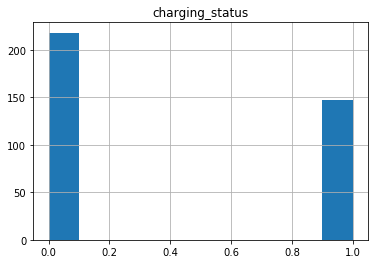

In [24]:
data.hist(column='charging_status')
plt.show()


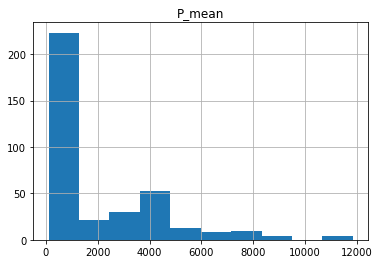

In [28]:
data.hist(column='P_mean')
plt.show()

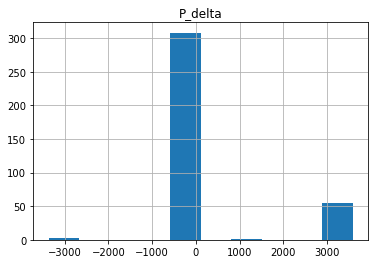

In [25]:
data.hist(column='P_delta')
plt.show()

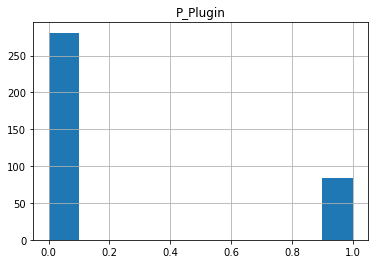

In [26]:
data.hist(column='P_Plugin')
plt.show()

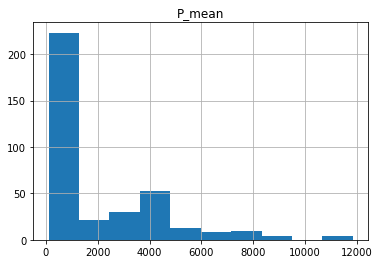